In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv('uber_cleaned.csv')
coords = df[['Lat', 'Lon']].values
inertia = []
for k in range(5, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coords)
    inertia.append(kmeans.inertia_)


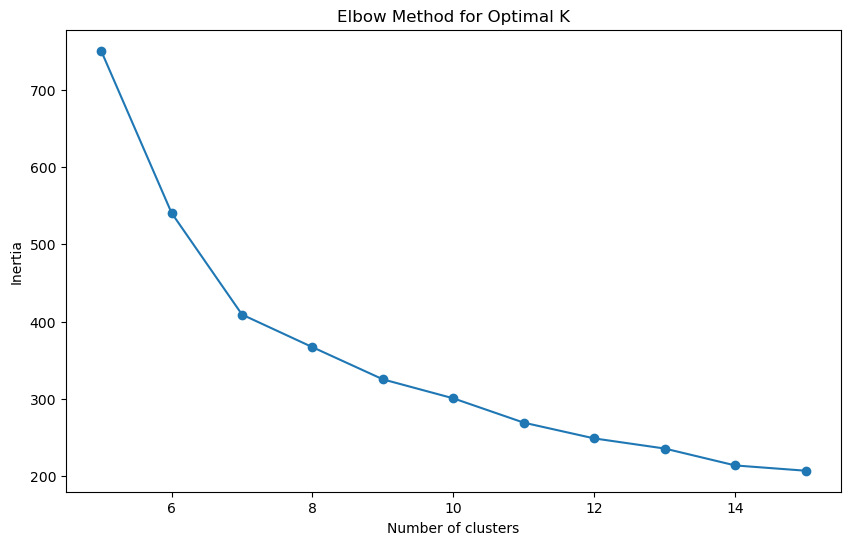

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


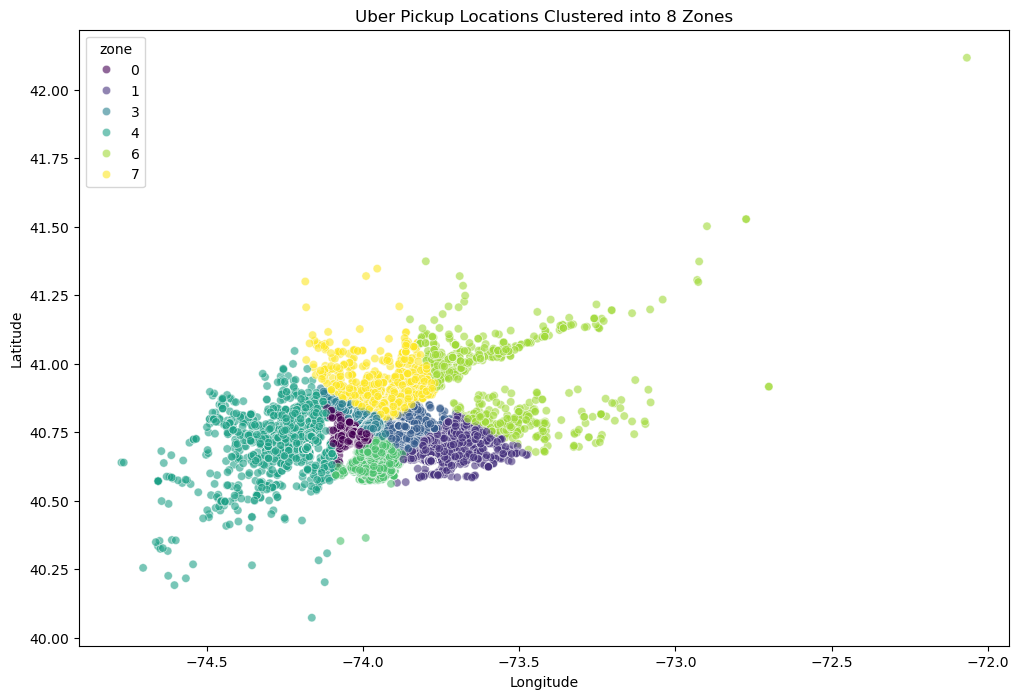


Pickup counts per zone:
zone
0    245129
1     13742
2     16038
3    216342
4      4856
5     59565
6       939
7      7905
Name: count, dtype: int64


In [4]:

plt.figure(figsize=(10, 6))
plt.plot(range(5, 16), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


optimal_k = 8
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['zone'] = kmeans.fit_predict(coords)


plt.figure(figsize=(12, 8))
sns.scatterplot(x='Lon', y='Lat', hue='zone', data=df, palette='viridis', alpha=0.6)
plt.title(f'Uber Pickup Locations Clustered into {optimal_k} Zones')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


zone_counts = df['zone'].value_counts().sort_index()
print("\nPickup counts per zone:")
print(zone_counts)
